In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("/content/gdrive/My Drive/dl_coursework")

In [0]:
import torch
import copy
import utils
import decoder
import trainnet
import wavelet
import dip.skip as skip
import numpy as np
from PIL import Image
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# read a image without noise and convert it to tensor
img_path = './test_data/astronaut.png'
img_pil = Image.open(img_path)
img_clean_np = utils.pil_numpy(img_pil)
img_clean_tensor = utils.np_tensor(img_clean_np)
img_clean_tensor = img_clean_tensor.cuda()

In [0]:
def add_noise(img_np, sigma):
    noise = np.random.normal(scale=sigma, size=img_np.shape)
    img_noisy_np = img_np + noise
    return np.clip(img_noisy_np, 0,1).astype(np.float32), noise

In [0]:
img_clean_np.shape

(3, 512, 512)

In [0]:
# add noise to the image
img_noisy_np, _ = add_noise(img_clean_np, sigma=0.1)
img_noisy_tensor = utils.np_tensor(img_noisy_np)
img_noisy_tensor = img_noisy_tensor.cuda()

# get three different size deep decoders (k = 32, 64, 128)
dd_net_32 = decoder.Decoder(k_channels=32,
                            output_channels=3,
                            upsample_times=5)
dd_net_32 = dd_net_32.cuda()

dd_net_64 = decoder.Decoder(k_channels=64,
                            output_channels=3,
                            upsample_times=5)
dd_net_64 = dd_net_64.cuda()

dd_net_128 = decoder.Decoder(k_channels=128,
                             output_channels=3,
                             upsample_times=5)
dd_net_128 = dd_net_128.cuda()

In [0]:
utils.psnr(img_clean_np, img_noisy_np)

20.433042506127872

In [0]:
# train deep decoder (k = 32)
net_32, mse_n_32, mse_t_32, net_input_32 = trainnet.train_net(net = dd_net_32,
                                  num_epoches = 10000,
                                  lr = 0.01,
                                  img_noisy = img_noisy_tensor,
                                  img_clean = img_clean_tensor,
                                  k_channels = 32)

tensor(0.0986, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0104, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0101, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0100, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0098, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0099, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0099, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0098, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0098, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0097, device='cuda:0', grad_fn=<MseLossBackward>)


In [0]:
image_dd_32 = net_32(net_input_32).cpu().detach().numpy()[0]
psnr_dd_32 = utils.psnr(image_dd_32, img_clean_np)
print(' The PSNR of deep decoder is: %.2f' % psnr_dd_32)

 The PSNR of deep decoder is: 28.85


In [0]:
# train deep decoder (k = 64)
net_64, mse_n_64, mse_t_64, net_input_64 = trainnet.train_net(net = dd_net_64,
                                  num_epoches = 10000,
                                  lr = 0.01,
                                  img_noisy = img_noisy_tensor,
                                  img_clean = img_clean_tensor,
                                  k_channels = 64)

tensor(0.0866, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0097, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0091, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0092, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0091, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0090, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0091, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0089, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0089, device='cuda:0', grad_fn=<MseLossBackward>)


In [0]:
image_dd_64 = net_64(net_input_64).cpu().detach().numpy()[0]
psnr_dd_64 = utils.psnr(image_dd_64, img_clean_np)
print(' The PSNR of deep decoder is: %.2f' % psnr_dd_64)

 The PSNR of deep decoder is: 30.34


In [0]:
# train deep decoder (k = 128)
net_128, mse_n_128, mse_t_128, net_input_128 = trainnet.train_net(net = dd_net_128,
                                  num_epoches = 10000,
                                  lr = 0.01,
                                  img_noisy = img_noisy_tensor,
                                  img_clean = img_clean_tensor,
                                  k_channels = 128)

tensor(0.0868, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0088, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0086, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0086, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0084, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0085, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0082, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0081, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0081, device='cuda:0', grad_fn=<MseLossBackward>)


In [0]:
image_dd_128 = net_128(net_input_128).cpu().detach().numpy()[0]
psnr_dd_128 = utils.psnr(image_dd_128, img_clean_np)
print(' The PSNR of deep decoder is: %.2f' % psnr_dd_128)

 The PSNR of deep decoder is: 29.24


In [0]:
def comparison_output_img(img_origin, img_noisy, img_32, img_64, img_128):
    fig = plt.figure(figsize=(20,20))
    ax = fig.subplots(1,5)

    ax[0].imshow(np.clip(img_origin.transpose(1,2,0), 0,1))
    ax[0].set_title('original image')
    ax[0].axis('off')

    ax[1].imshow(np.clip(img_noisy.transpose(1,2,0), 0,1))
    ax[1].set_title('noisy image: %.2fdB' % utils.psnr(img_noisy, img_clean_np))
    ax[1].axis('off')

    ax[2].imshow(np.clip(img_32.transpose(1,2,0), 0,1))
    ax[2].set_title('DD (k=32): %.2fdB' % utils.psnr(img_32, img_clean_np))
    ax[2].axis('off')

    ax[3].imshow(np.clip(img_64.transpose(1,2,0), 0,1))
    ax[3].set_title('DD (k=64): %.2fdB' % utils.psnr(img_64, img_clean_np))
    ax[3].axis('off')

    ax[4].imshow(np.clip(img_128.transpose(1,2,0), 0,1))
    ax[4].set_title('DD (k=128): %.2fdB' % utils.psnr(img_128, img_clean_np))
    ax[4].axis('off')

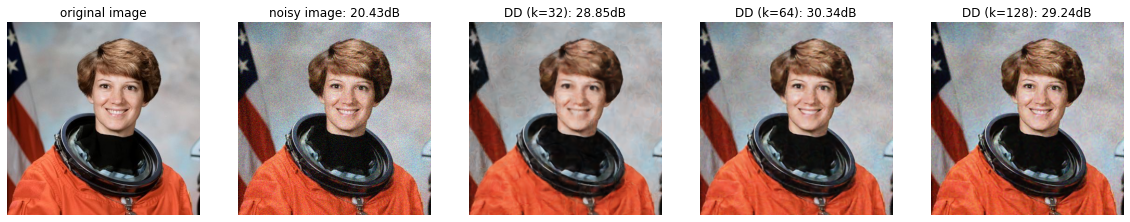

In [0]:
comparison_output_img(img_clean_np, img_noisy_np, image_dd_32, image_dd_64, image_dd_128)

In [0]:
# compare mse loss of the clean image along the epoch
def comparison_true_loss(mse_t_32, mse_t_64, mse_t_128):
    plt.figure(figsize=(6,4))
    plt.loglog(mse_t_32, label='k=32')
    plt.loglog(mse_t_64, label='k=64')
    plt.loglog(mse_t_128, label='k=128')
    plt.grid()
    plt.legend()

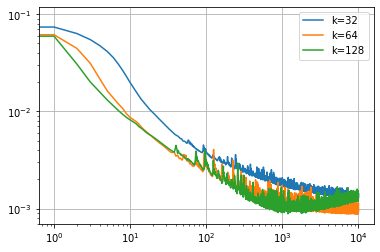

In [0]:
comparison_true_loss(mse_t_32 = mse_t_32,
                     mse_t_64 = mse_t_64,
                     mse_t_128 = mse_t_128)

# k=64 is the best, but if apply early stopping of optimization, k=128 is the best one.

In [0]:
# add larger noise to the image
img_noisy_np_2, _ = add_noise(img_clean_np, sigma=0.25)
img_noisy_tensor_2 = utils.np_tensor(img_noisy_np_2)
img_noisy_tensor_2 = img_noisy_tensor_2.cuda()

# get three different size deep decoders (k = 32, 64, 128)
dd_net_32_2 = decoder.Decoder(k_channels=32,
                            output_channels=3,
                            upsample_times=5)
dd_net_32_2 = dd_net_32_2.cuda()

dd_net_64_2 = decoder.Decoder(k_channels=64,
                            output_channels=3,
                            upsample_times=5)
dd_net_64_2 = dd_net_64_2.cuda()

dd_net_128_2 = decoder.Decoder(k_channels=128,
                             output_channels=3,
                             upsample_times=5)
dd_net_128_2 = dd_net_128_2.cuda()

In [0]:
utils.psnr(img_clean_np, img_noisy_np_2)

13.25898249447283

In [0]:
# train deep decoder (k = 32)
net_32_2, mse_n_32_2, mse_t_32_2, net_input_32_2 = trainnet.train_net(net = dd_net_32_2,
                                  num_epoches = 10000,
                                  lr = 0.01,
                                  img_noisy = img_noisy_tensor_2,
                                  img_clean = img_clean_tensor,
                                  k_channels = 32)

tensor(0.1180, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0464, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0461, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0460, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0460, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0460, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0460, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0460, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0459, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0459, device='cuda:0', grad_fn=<MseLossBackward>)


In [0]:
image_dd_32_2 = net_32_2(net_input_32_2).cpu().detach().numpy()[0]
psnr_dd_32_2 = utils.psnr(image_dd_32_2, img_clean_np)
print(' The PSNR of deep decoder is: %.2f' % psnr_dd_32_2)

 The PSNR of deep decoder is: 24.47


In [0]:
# train deep decoder (k = 64)
net_64_2, mse_n_64_2, mse_t_64_2, net_input_64_2 = trainnet.train_net(net = dd_net_64_2,
                                  num_epoches = 10000,
                                  lr = 0.01,
                                  img_noisy = img_noisy_tensor_2,
                                  img_clean = img_clean_tensor,
                                  k_channels = 64)

tensor(0.1092, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0456, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0444, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0441, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0440, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0438, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0439, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0438, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0437, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0437, device='cuda:0', grad_fn=<MseLossBackward>)


In [0]:
image_dd_64_2 = net_64_2(net_input_64_2).cpu().detach().numpy()[0]
psnr_dd_64_2 = utils.psnr(image_dd_64_2, img_clean_np)
print(' The PSNR of deep decoder is: %.2f' % psnr_dd_64_2)

 The PSNR of deep decoder is: 23.53


In [0]:
# train deep decoder (k = 128)
net_128_2, mse_n_128_2, mse_t_128_2, net_input_128_2 = trainnet.train_net(net = dd_net_128_2,
                                  num_epoches = 10000,
                                  lr = 0.01,
                                  img_noisy = img_noisy_tensor_2,
                                  img_clean = img_clean_tensor,
                                  k_channels = 128)

tensor(0.1112, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0440, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0426, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0417, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0412, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0410, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0404, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0403, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0406, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0399, device='cuda:0', grad_fn=<MseLossBackward>)


In [0]:
image_dd_128_2 = net_128_2(net_input_128_2).cpu().detach().numpy()[0]
psnr_dd_128_2 = utils.psnr(image_dd_128_2, img_clean_np)
print(' The PSNR of deep decoder is: %.2f' % psnr_dd_128_2)

 The PSNR of deep decoder is: 21.41


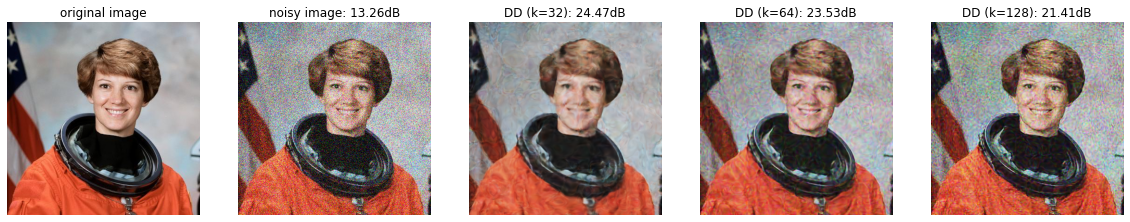

In [0]:
comparison_output_img(img_clean_np, img_noisy_np_2, image_dd_32_2, image_dd_64_2, image_dd_128_2)

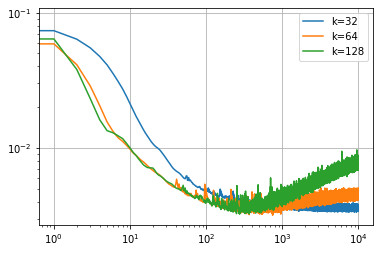

In [0]:
comparison_true_loss(mse_t_32 = mse_t_32_2,
                     mse_t_64 = mse_t_64_2,
                     mse_t_128 = mse_t_128_2)